In [1]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from IPython.display import Image

from datetime import datetime

In [2]:
# Time and robot egomotion
time = []
standardized_time = []
standardized_time2 = []
compass_heading = []
speed = []

# sonde data
temp = []
PH = []
cond = [] # ms
chlorophyll = [] 
ODO = [] # mg/L
sonar = []
angular_z = []

# wp data
wp_time = []
wp_seq = []

In [3]:
initial_time = None
time_crop = 4000
time_crop1 = 1460
time_crop2 = 1620

#1460, 1620
#1900 2070

# File loading from relative path
#file = '../../../Data/ISER2021/China-catabot-20201006.csv'
file = '../../../Data/ISER2021/China-catabot-20201006-gndspeed.csv'
# File loading from relative path
file2 = '../../../Data/ISER2021/China-catabot-20201006-mavros.csv'

# original data
with open(file, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # robot data
        if initial_time is None:
            initial_time = float(row[0])
        
        current_time = float(row[0])
        
        if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
        #if current_time - initial_time <= time_crop:
            time.append(float(row[0]))
            compass_heading.append(float(row[4]))
            speed.append(float(row[6]))
            angular_z.append(float(row[18]))

            # sonde data
            temp.append(float(row[23]))
            PH.append(float(row[26]))
            cond.append(float(row[25]))
            chlorophyll.append(float(row[29]))
            ODO.append(float(row[31]))
            sonar.append(float(row[8]))


    minimum_time = min(time)
    for time_stamp in time:
        standardized_time.append(time_stamp - minimum_time)

# wp data 
with open(file2, 'r') as csvfile2:
    csvreader2 = csv.reader(csvfile2, delimiter=',')
    header = next(csvreader2)
    for row in csvreader2:
        current_time = float(row[0])
        
        #if current_time - initial_time <= time_crop:
        if current_time - initial_time >= time_crop1 and current_time - initial_time < time_crop2:
            wp_time.append(float(row[0]))
            wp_seq.append(float(row[1]))
            
    for time_stamp in wp_time:
        standardized_time2.append(time_stamp - minimum_time)

In [4]:
standardized_time2

[20.503090858459473, 25.52251172065735, 77.68033051490784, 82.70144200325012]

### Compass heading

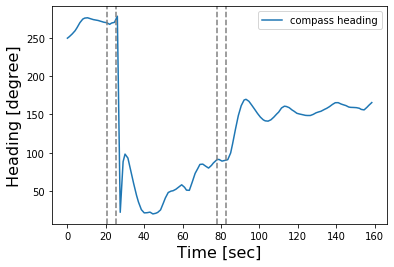

In [5]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Heading [degree]', fontsize=16)
ax1.plot(standardized_time, compass_heading, label='compass heading')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

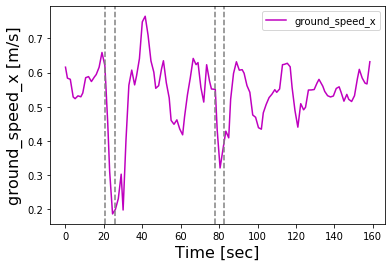

In [6]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ground_speed_x [m/s]', fontsize=16)
ax1.plot(standardized_time, speed, label='ground_speed_x', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

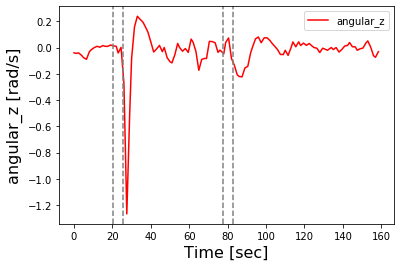

In [7]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('angular_z [rad/s]', fontsize=16)
ax1.plot(standardized_time, angular_z, label='angular_z', color='r')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

### Temperature

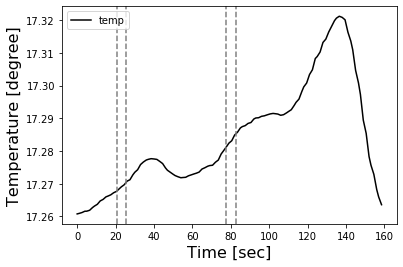

Standard Deviation of the temp is 0.01639523259678166 
Mean of the temp is 17.28383377738621 


In [8]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Temperature [degree]', fontsize=16)
ax1.plot(standardized_time, temp, label='temp', color='k')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(temp)))
print("Mean of the temp is % s " %(statistics.mean(temp))) 

### PH

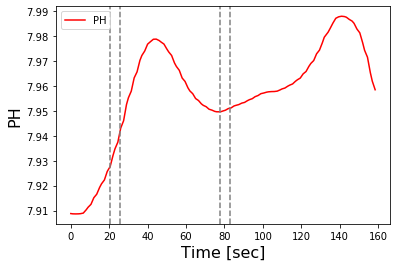

Standard Deviation of the temp is 0.021095281013597856 
Mean of the temp is 7.9571684712949 


In [9]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('PH', fontsize=16)
ax1.plot(standardized_time, PH, label='PH', color='r')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the temp is % s " %(statistics.stdev(PH)))
print("Mean of the temp is % s " %(statistics.mean(PH))) 

### Conductivity

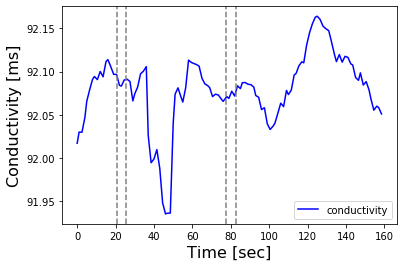

Standard Deviation of the chlorophyll is 0.04289041191046108 
Mean of the chlorophyll is 92.07920903744905 


In [10]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('Conductivity [ms]', fontsize=16)
ax1.plot(standardized_time, cond, label='conductivity', color='b')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(cond)))
print("Mean of the chlorophyll is % s " %(statistics.mean(cond)))

### Chlorophyll 

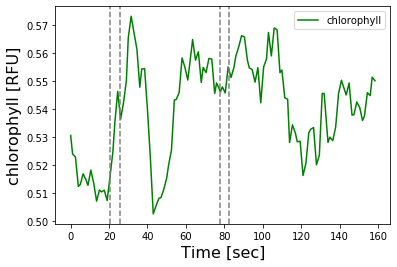

Standard Deviation of the chlorophyll is 0.017690356432476018 
Mean of the chlorophyll is 0.540047482303951 


In [11]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('chlorophyll [RFU]', fontsize=16)
ax1.plot(standardized_time, chlorophyll, label='chlorophyll', color='g')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the chlorophyll is % s " %(statistics.stdev(chlorophyll)))
print("Mean of the chlorophyll is % s " %(statistics.mean(chlorophyll))) 

### ODO

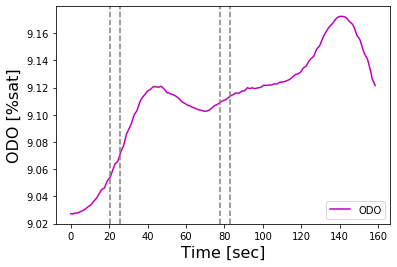

Standard Deviation of the DO is 0.03775641037769599 
Mean of the DO is 9.110848916095236 


In [12]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('ODO [%sat]', fontsize=16)
ax1.plot(standardized_time, ODO, label='ODO', color='m')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

print("Standard Deviation of the DO is % s " %(statistics.stdev(ODO)))
print("Mean of the DO is % s " %(statistics.mean(ODO))) 

### Sonar depth

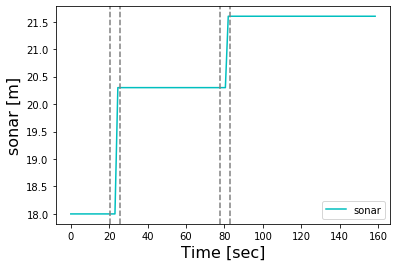

In [13]:
# Figure initialization
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time [sec]', fontsize=16)
ax1.set_ylabel('sonar [m]', fontsize=16)
ax1.plot(standardized_time, sonar, label='sonar', color='c')
ax1.legend()

for wp in standardized_time2:
    plt.axvline(x=wp, color='gray', linestyle='--')
    
plt.show()

[Text(0, 0, '1460'),
 Text(0, 0, '1480'),
 Text(0, 0, '1520'),
 Text(0, 0, '1540'),
 Text(0, 0, '1560'),
 Text(0, 0, '1580'),
 Text(0, 0, '1600'),
 Text(0, 0, '1620'),
 Text(0, 0, '1640'),
 Text(0, 0, '1660')]

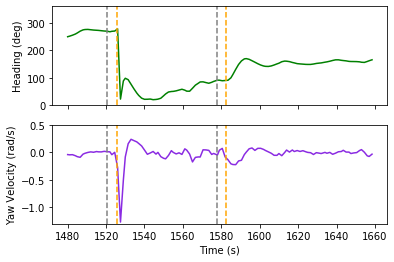

In [14]:
fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Vertically stacked subplots')
ax1.plot(standardized_time, compass_heading, color='green')
ax1.tick_params(axis='y')
ax1.tick_params(labelbottom=False)
ax1.set_ylim([0, 360])
ax1.set_ylabel('Heading (deg)')

ax2.plot(standardized_time, angular_z, color='blueviolet')
ax2.set_ylim([-1.3, 0.5])
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Yaw Velocity (rad/s)')

axis = (ax1, ax2)
for wp in standardized_time2:
    for each in axis:
        if wp == standardized_time2[0] or wp == standardized_time2[2]:
            each.axvline(x=wp, color='gray', linestyle='--')
        else:
            each.axvline(x=wp, color='orange', linestyle='--')
            
ax2.set_xticklabels(['1460', '1480', '1520', '1540', '1560', '1580', '1600', '1620', '1640', '1660'])

#fig.savefig('1006-china-turning-zoom.pdf', bbox_inches ='tight')

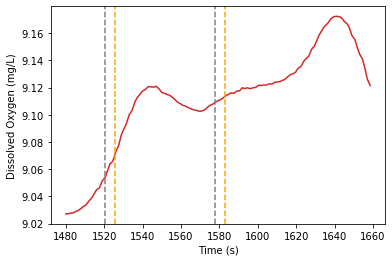

In [18]:
# Figure initialization
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Dissolved Oxygen (mg/L)')
ax1.plot(standardized_time, ODO, label='ODO', color=color)
ax1.tick_params(axis='y')
#ax1.legend()

for wp in standardized_time2:
    if wp == standardized_time2[0] or wp == standardized_time2[2]:
        ax1.axvline(x=wp, color='gray', linestyle='--')
    else:
        ax1.axvline(x=wp, color='orange', linestyle='--')
    
ax1.set_xticklabels(['1460', '1480', '1520', '1540', '1560', '1580', '1600', '1620', '1640', '1660'])
plt.show()

fig.savefig('1006-china-turning-zoom-sensor.pdf', bbox_inches ='tight')

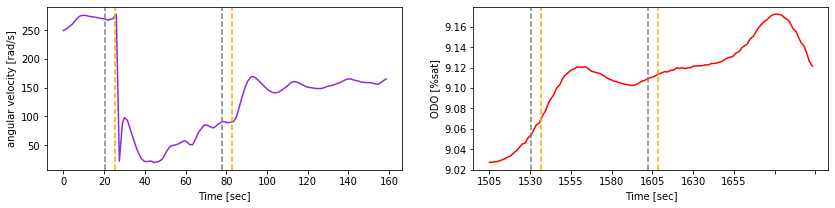

In [16]:
# Figure initialization
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,3))

ax1.set_xlabel('Time [sec]')
ax1.set_ylabel('angular velocity [rad/s]')
#ax1.set_xlim([-10,174])
ax1.plot(standardized_time, compass_heading, label='angular velocity', color='blueviolet')

ax2.set_xlabel('Time [sec]')
ax2.set_ylabel('ODO [%sat]')
#ax2.set_xlim([-10,174])
ax2.plot(standardized_time, ODO, label='ODO', color='r')

axis = (ax1, ax2)
for wp in standardized_time2:
    for each in axis:
        if wp == standardized_time2[0] or wp == standardized_time2[2]:
            each.axvline(x=wp, color='gray', linestyle='--')
        else:
            each.axvline(x=wp, color='orange', linestyle='--')
        
ax2.set_xticklabels(['1480', '1505', '1530', '1555', '1580', '1605', '1630', '1655'])
plt.show()